# Familiarización con Python, Jupyter Notebook, Matplotlib, ...
### Autora: Sandra Díaz Aguilar

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# Leer el csv
df = pd.read_csv('data/prueba.csv')

# Resumirlo para facilitar las pruebas
# Usamos una fila de cada 12 hasta un maximo de 500
df_pruebas = df.iloc[::12].head(500)


In [9]:
df_pruebas

,EPO,W_MEAN,W_MEAN_FILT,W_STD,NUM_WALK,SMA,DYSKP,DYSKC,LEN,NUM_STEPS,...,MOTOR10,DYSK10,BRADY10,TH_LO,TH_HI,AGE,H&Y,LL,PAT,Unnamed: 28
0,1563901698000,0.000000,0.000000,0.000000,0,0.188827,0.0,0.763158,NaN,0,...,3,0,3,8.203857,9.281521,58,1.0,96,8,NaN
12,1563902419000,12.358747,11.615968,1.918523,25,1.163419,NaN,0.000000,1.110906,62,...,3,2,1,8.203857,9.281521,58,1.0,96,8,NaN
24,1563903140000,0.000000,13.534096,0.000000,0,0.243747,0.0,0.526316,NaN,0,...,1,3,1,8.203857,9.281521,58,1.0,96,8,NaN
36,1563903861000,0.000000,0.000000,0.000000,0,0.290272,0.0,0.263158,NaN,0,...,1,2,3,8.203857,9.281521,58,1.0,96,8,NaN
48,1563904581000,7.339034,10.587678,0.895744,3,0.424407,0.0,0.210526,0.853357,22,...,3,2,1,8.203857,9.281521,58,1.0,96,8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5940,1564426347000,9.560918,9.905898,2.159579,18,0.876153,NaN,0.000000,0.851131,68,...,1,3,1,8.203857,9.281521,58,1.0,96,8,NaN
5952,1564427068000,7.238354,9.295520,1.044708,7,0.545447,0.0,0.027027,0.789304,34,...,1,3,1,8.203857,9.281521,58,1.0,96,8,NaN
5964,1564427788000,0.000000,10.011109,0.000000,0,0.168814,0.0,0.783784,NaN,0,...,2,3,1,8.203857,9.281521,58,1.0,96,8,NaN
5976,1564428509000,10.629402,9.837974,0.000000,1,0.567487,0.0,0.270270,1.039588,14,...,2,2,1,8.203857,9.281521,58,1.0,96,8,NaN


## Significado de los parámetros

- EPO: es la medida de tiempo que se ha adquirido la muestra. Llamada Epoch Time o Tiempo Unix, son los segundos que han pasado en UTC desde el 1 de Enero del 1970.
- W_MEAN_FILT: Es la agregación de algunas características de frecuencia de los pasos que ha realizado el paciente en el minuto correspondiente, y por lo tanto tiene unidades de m/s2. Esta variable, agregada cada media hora, es la fluidez de la zancada que se representa en el informe PDF.
- SMA: Es la suma del módulo de las aceleraciones (m/s2) en un minuto y se refiere a la cantidad de movimiento medido desde la cintura y que tiene una alta correlación con el gasto energético realizado en ese minuto. Se debe considerar que los movimientos involuntarios producidos por algunos trastornos del movimiento como la discinesia pueden afectar notablemente a esta variable.
- LEN: Media de la longitud de paso en metros durante el minuto de interés calculada mediante un estimador basado en un modelo de péndulo invertido. Resaltar que este estimador tiene como parámetro de entrada la longitud de la pierna del paciente. Si este parámetro no se introduce correctamente en la fase de configuración del sensor puede suponer un error considerable.
- NUM_STEPS: Número de pasos detectados, dentro del minuto.
- SPEED: Media de la velocidad de zancada, dentro del minuto.
- CAD: Cadencia media de los pasos detectados en este minuto.
- TW: Numero de ventanas que el paciente ha caminado en este minuto. Cada nueva ventana corresponde a 1.6 segundos. Por lo tanto, para transformar esta medida en segundos hay que multiplicarla por 1.6.
- TL: Numero de ventanas en un minuto que el paciente ha estado tumbado. Cada nueva ventana corresponde a 1.6 segundos. Por lo tanto, para transformar esta medida en segundos hay que multiplicarla por 1.6.
- TRANS: Número de transiciones posturales que el paciente ha realizado en este minuto.
- FALLS: Número de ventanas con posible caídas detectadas en este minuto. Este es un valor que indica las ventanas con detección de caída dentro del último minuto. En el informe PDF se asocia la detección de una caída cuando en el minuto actual se ha detectado un numero de ventanas superior o igual a 35 y en el minuto anterior se ha detectado un valor menor a 35.
- FOG_EP: Número de episodios de Bloqueos de la Marcha en un minuto.
- FOG_WIN: Número de ventanas con Bloqueos de la Marcha en este minuto. La división de este valor entre el número de episodios (FOG_EP) y todo ello multiplicado por 1.6s. Da como resultado la media de duración de los episodios dentro de ese minuto.
- BTN_PRESSED: Indicador de eventos del botón del sensor. Esta variable puede presentar 2 valores: ‘0’ o ‘1’, donde ‘1’ corresponde a que se ha apretado el botón en ese minuto.
- MOTOR10: Salida del estado motor del paciente cada 10 minutos. Esta variable puede presentar  4 valores: 0 = OFF, 1 = ON, 2 = INT o 3 = NaN.
- DYSK10: Salida del algoritmo de la discinesia en 10 minutos. Esta variable puede presentar 4 valores: 0 = NaN, 1 = Dysk sí, 2 = No Dysk o 3 = NaN.
- BRADY10: Salida del estado motor del paciente cada 10 minutos sin filtro de discinesia (MOTOR10 es con el filtro de discinesia). Esta variable puede presentar 4 valores: 0 = OFF, 1 = ON, 2 = INT o 3 = NaN. Para el cálculo de esta variable se utiliza la variable W_MEAN_FILT, que es una aproximación de la severidad de la marcha bradicinética a través de un modelo de regresión.
- TH_LO y TH_HI: se corresponden a los umbrales de fluidez que marcan los límites de esta variable asociada a los estados ON y OFF.
- AGE: Edad del paciente
- H&Y: Hoehn & Yahr en OFF.
- LL: Longitud de pierna del paciente desde el suelo hasta que acaba la cresta ilíaca del paciente.
- PAT: identificador de paciente..
cada (Figura 11).


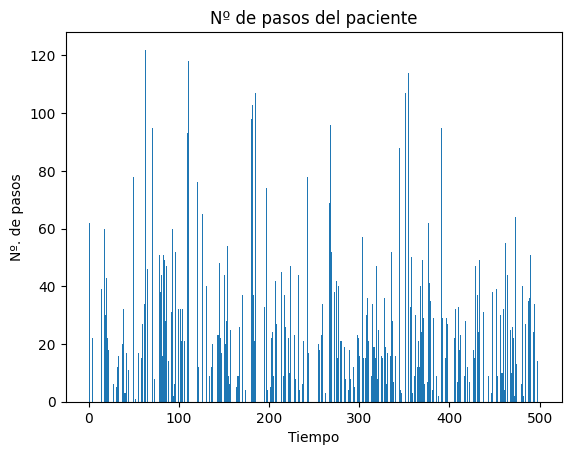

In [4]:
# Numero de pasos a lo largo del tiempo
x = np.arange(500)

plt.bar(x ,df_pruebas['NUM_STEPS'])

plt.title('Nº de pasos del paciente')
plt.xlabel('Tiempo')
plt.ylabel('Nº. de pasos')

plt.show()

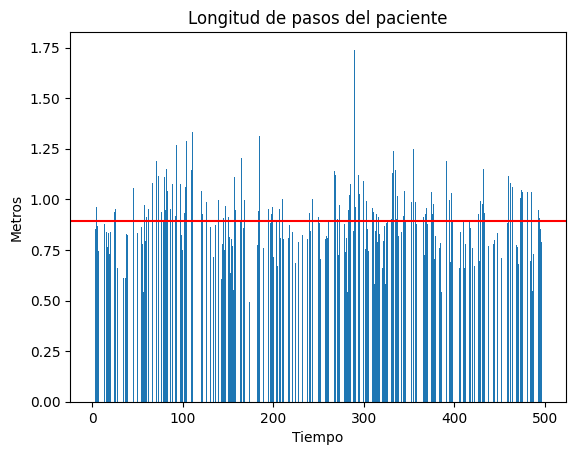

In [5]:
# Media de la longitud de paso en metros a lo largo del tiempo
x = np.arange(500)

plt.bar(x ,df_pruebas['LEN'])
media = df_pruebas['LEN'].mean()
plt.axhline(y=media, color='r', linestyle='-')
plt.title('Longitud de pasos del paciente')
plt.xlabel('Tiempo')
plt.ylabel('Metros')

plt.show()

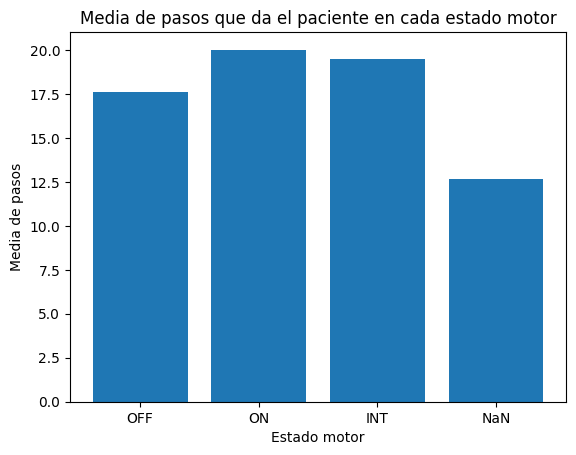

In [32]:
#Media de pasos que da el paciente en cada estado motor
df_group = df.groupby(['MOTOR10'])['NUM_STEPS'].mean()

plt.bar(df_group.index, df_group.values)

labels = ["OFF", "ON", "INT", "NaN"]
plt.xticks([0, 1, 2, 3], labels)
plt.xlabel('Estado motor')
plt.ylabel('Media de pasos')

plt.title('Media de pasos que da el paciente en cada estado motor')
plt.show()

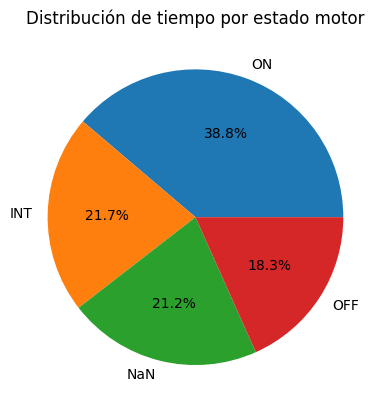

In [37]:
#Porcentaje del tiempo que el paciente está en cada estado motor
tiempo = df['MOTOR10'].value_counts()
estados = {0: 'OFF',1: 'ON',2: 'INT',3: 'NaN'}

labels = [estados[i] for i in tiempo.index]

plt.pie(tiempo,labels=labels,autopct='%1.1f%%')
plt.title('Distribución de tiempo por estado motor')
plt.show()

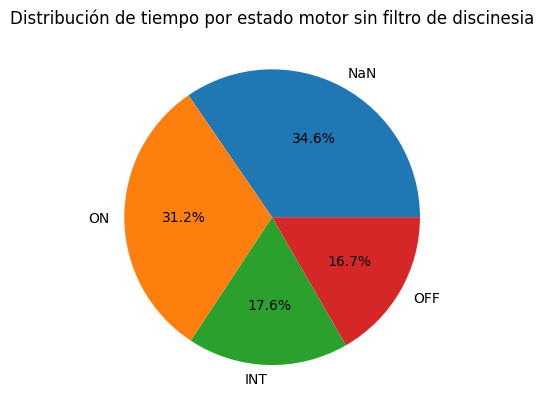

In [46]:
#Porcentaje del tiempo que el paciente está en cada estado motor
tiempo = df['BRADY10'].value_counts()
estados = {0: 'OFF',1: 'ON',2: 'INT',3: 'NaN'}

labels = [estados[i] for i in tiempo.index]

plt.pie(tiempo,labels=labels,autopct='%1.1f%%')
plt.title('Distribución de tiempo por estado motor sin filtro de discinesia')
plt.show()